In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/manos/Downloads/heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
# Features and target
X = df.drop("target", axis=1)
y = df["target"]


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [7]:
# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [8]:
# Pruned Decision Tree
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("\nPruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



Pruned Decision Tree Accuracy: 0.8

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Cross-Validation Scores: [1.         1.         0.98536585 1.         0.98536585]
Mean CV Accuracy: 0.9941463414634146


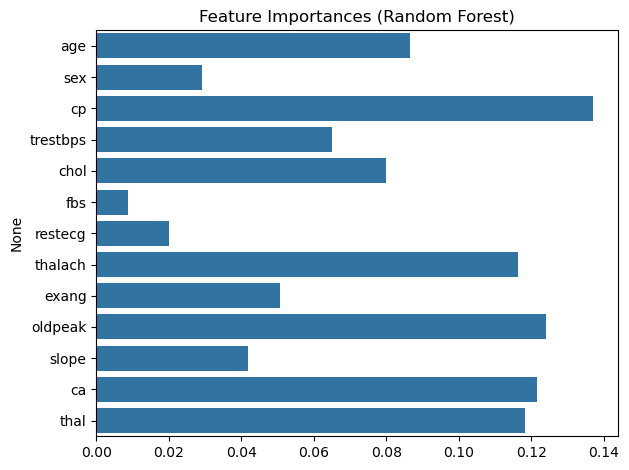

In [9]:
# Feature Importances
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()